Ciclo Crisis 52-55 ignorado (fuera de rango)
Ciclo Expansión 56-69 ignorado (fuera de rango)
Ciclo Recesión 70-81 ignorado (fuera de rango)
Ciclo Crisis 82-85 ignorado (fuera de rango)
Ciclo Expansión 86-99 ignorado (fuera de rango)


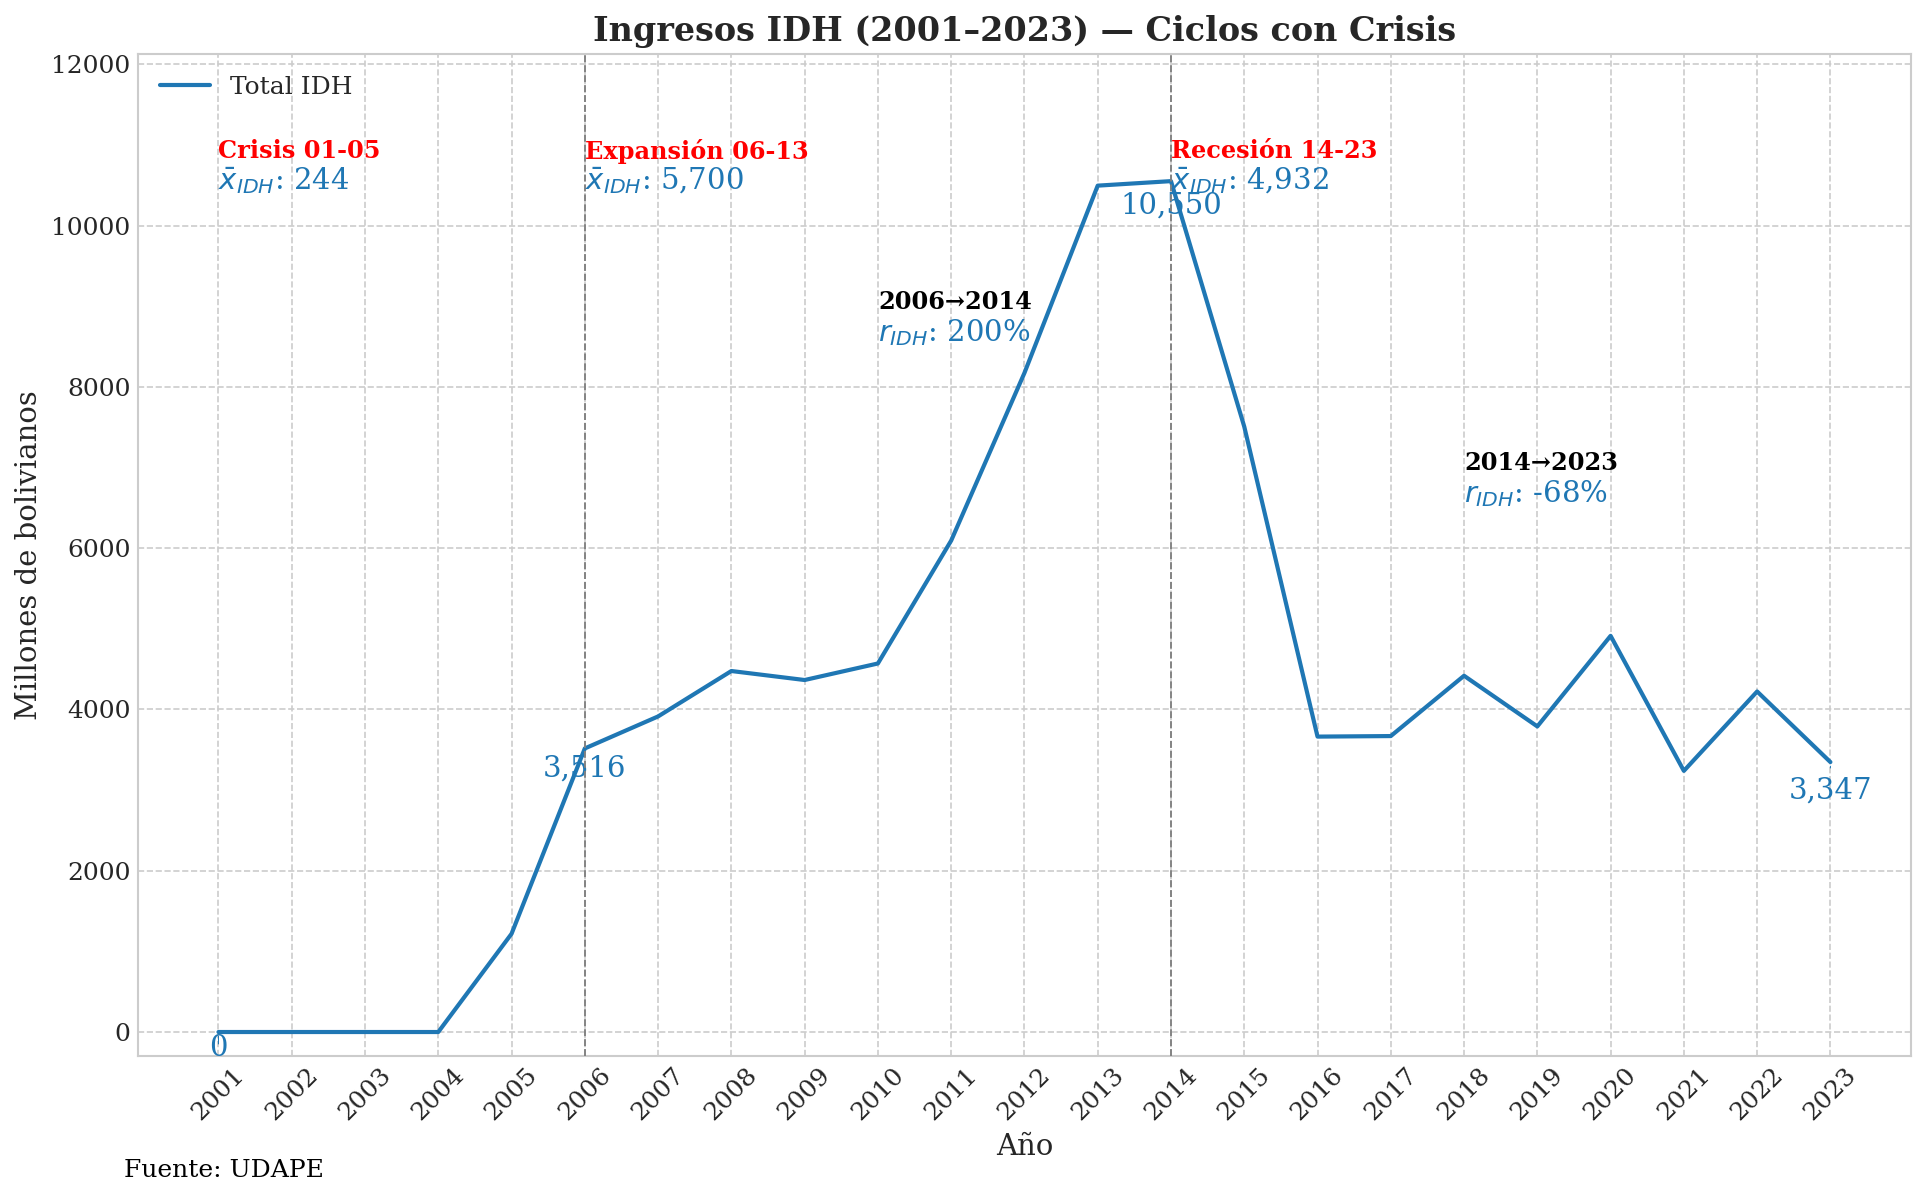

In [18]:
# ─────────────────────────────────────────────────────────────
# Importaciones comunes
# ─────────────────────────────────────────────────────────────
import sys, os, sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../'))  # utilidades propias
from graficos_utils import *
from config import (
    # Con‑crisis
    CYCLES, annot_years, periodos_tasas, hitos_v,
    # Sin‑crisis
    CYCLES_SIN_CRISIS, annot_years_sin_crisis,
    periodos_tasas_sin_crisis, hitos_v_sin_crisis,
    # Periodos estructurales
    CYCLES_PERIODOS, annot_years_periodos,
    periodos_tasas_periodos, hitos_v_periodos,
)

# Directorio de salida y estilo global
output_dir = "../../../../assets/tesis/serie_completa/ingresos_idh"
os.makedirs(output_dir, exist_ok=True)
set_style()

# ─────────────────────────────────────────────────────────────
# Carga de datos: ingresos_nacionales.total_idh
# ─────────────────────────────────────────────────────────────
with sqlite3.connect('../../../../db/proyectomacro.db') as conn:
    df = (
        pd.read_sql('SELECT año, total_idh FROM ingresos_nacionales', conn)
          .set_index('año')
          .sort_index()
    )

# ─────────────────────────────────────────────────────────────
# Componentes comunes
# ─────────────────────────────────────────────────────────────
componentes = [('total_idh', 'Total IDH')]
cols_componentes = ['total_idh']
abbr_map = {'total_idh': 'IDH'}
custom_colors = {'total_idh': '#1f77b4'}  # azul

# ============================================================
# 1) PRIMERA GRÁFICA — CON CRISIS
# ============================================================
annotate_years       = adjust_annot_years(df, annot_years)
cycles_stats         = {n: df.loc[s, cols_componentes].mean().to_dict()
                        for n, s in adjust_cycles(df, CYCLES).items()}
periodos             = adjust_periods(df, periodos_tasas)

annotation_offsets   = {
    'total_idh': {
        2001: (0, -200),
        2006: (0, -250),
        2014: (0, -300),
        2023: (0, -350),
    }
}

hitos_offset         = {a: 0.8 for a in hitos_v}
medias_offsets       = {
    'Crisis 01-05':    (2001, 1),
    'Expansión 06-13': (2006, 1),
    'Recesión 14-23':  (2014, 1),
}

tasas_offsets = {
    '2006-2014': (2010, 0.83),
    '2014-2023': (2018, 0.65),
}

fig, ax = init_base_plot(
    df, componentes, custom_colors,
    "Ingresos IDH (2001–2023) — Ciclos con Crisis",
    "Año", "Millones de bolivianos",
    source_text="Fuente: UDAPE"
)
add_hitos(ax, df.index, hitos_v, hitos_offset, line_kwargs={'lw': 0.9})
add_cycle_means_multi(ax, cycles_stats, medias_offsets, abbr_map, custom_colors,
                      line_spacing=ax.get_ylim()[1]*0.03)
add_year_value_annotations(ax, df, annotate_years, cols_componentes,
                           annotation_offsets, custom_colors, arrow_lw=0.5)
add_period_growth_annotations_multi(ax, df, periodos, cols_componentes,
                                    tasas_offsets, custom_colors, abbr_map)

ax.set_ylim(-300, df['total_idh'].max()*1.15)
plt.savefig(os.path.join(output_dir, "idh_ciclos.png"))
plt.show()
plt.close()

In [11]:
df.loc[2006:2014,'total_idh'].mean()

np.float64(6238.911111111111)

In [10]:
df.loc[2015:2023,'total_idh'].mean()

np.float64(4307.333333333333)

Ciclo Intervensionismo-estatal 50-84 ignorado (fuera de rango)


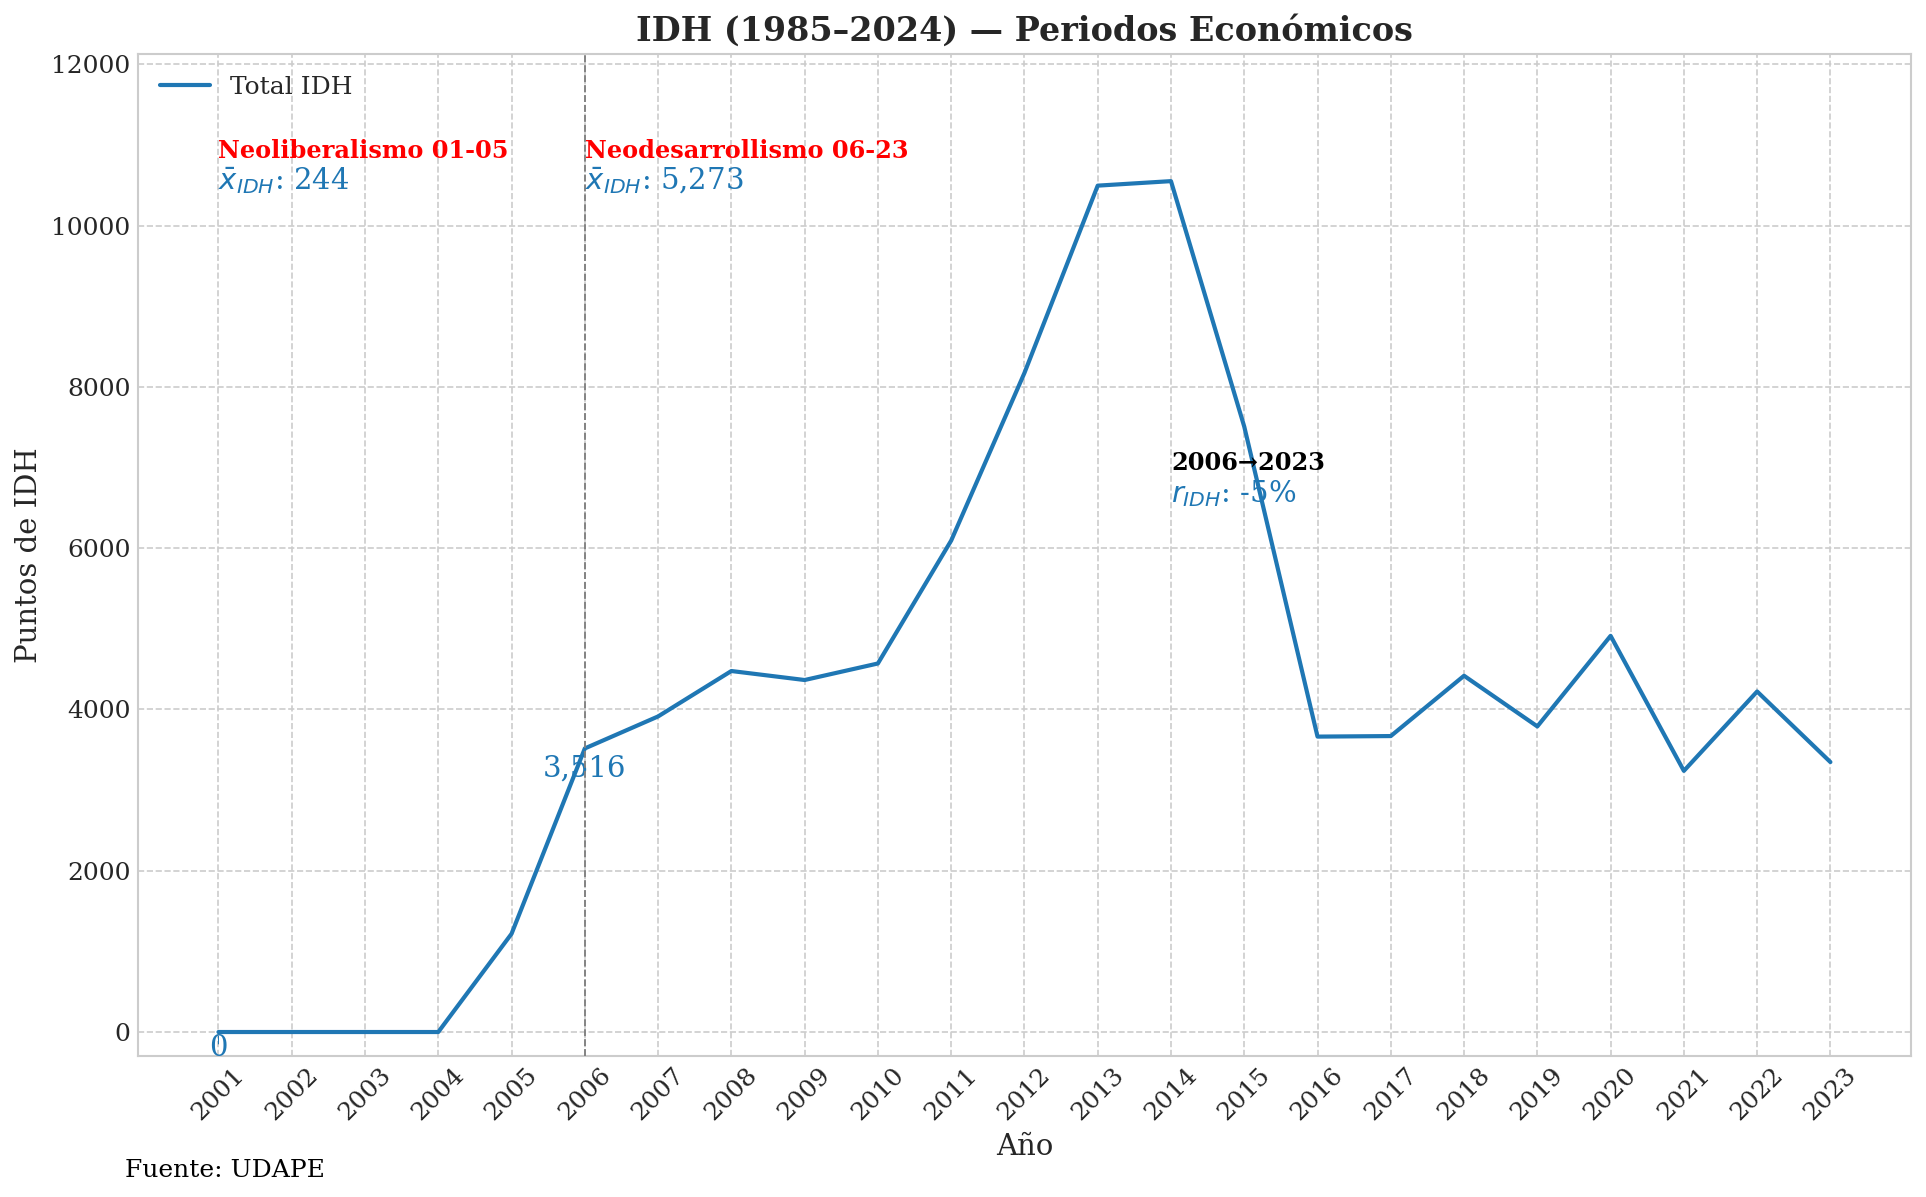

In [17]:
# ============================================================
# 3) TERCERA GRÁFICA — PERIODOS ESTRUCTURALES
# ============================================================
annotate_years_periodos = adjust_annot_years(df_idh, annot_years_periodos)
cycles_stats_periodos   = {n: df_idh.loc[s, cols_componentes].mean().to_dict()
                           for n, s in adjust_cycles(df_idh, CYCLES_PERIODOS).items()}
periodos_periodos       = adjust_periods(df_idh, periodos_tasas_periodos)

annotation_offsets_periodos = {
    'total_idh': {
        2001: (0, -200),
        2006: (0, -250),
        2022: (0, -320),
    }
}

hitos_offset_periodos       = {a: 0.8 for a in hitos_v_periodos}
medias_offsets_periodos     = {
    'Neoliberalismo 01-05':   (2001, 1),
    'Neodesarrollismo 06-23': (2006, 1),
}

tasas_offsets_periodos = {
    '2006-2023': (2014, 0.65),
}
# Gráfica
fig, ax = init_base_plot(
    df_idh, componentes, custom_colors,
    "IDH (1985–2024) — Periodos Económicos",
    "Año", "Puntos de IDH",
    source_text="Fuente: UDAPE"
)
add_hitos(ax, df_idh.index, hitos_v_periodos, hitos_offset_periodos,
          annotate_labels=tuple(), line_kwargs={'lw': 0.9})
add_cycle_means_multi(ax, cycles_stats_periodos, medias_offsets_periodos,
                      abbr_map, custom_colors, line_spacing=ax.get_ylim()[1]*0.03)
add_year_value_annotations(ax, df_idh, annotate_years_periodos, cols_componentes,
                           annotation_offsets_periodos, custom_colors, arrow_lw=0.5)
add_period_growth_annotations_multi(ax, df_idh, periodos_periodos, cols_componentes,
                                    tasas_offsets_periodos, custom_colors, abbr_map)

ax.set_ylim(-300, df_idh['total_idh'].max()*1.15)
plt.savefig(os.path.join(output_dir, "idh_periodos.png"))
plt.show()
plt.close()
